In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Read the data.

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

Id Home Ownership  Annual Income Years in current job  Tax Liens  \
0   0       Own Home       482087.0                  NaN        0.0   
1   1       Own Home      1025487.0            10+ years        0.0   
2   2  Home Mortgage       751412.0              8 years        0.0   
3   3       Own Home       805068.0              6 years        0.0   
4   4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN           1.0   
1                        0.0                           NaN           0.0   
2                        0.0                           NaN           0.0   
3                        1.0                           NaN           1.0   
4                        1.0                           NaN           0.0   

              Purpose        Term  Current Loan Amount  \
0  debt consolidation  Short Term           99999999.0   
1  debt consolidation   Long Term             264968.0   
2  debt consolidation  Short Term           99999999.0   
3  debt consolidation  Short Term             121396.0   
4  debt consolidation  Short Term             125840.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                 47386.0        7914.0         749.0               0  
1                394972.0       18373.0         737.0               1  
2                308389.0       13651.0         742.0               0  
3                 95855.0       11338.0         694.0               0  
4                 93309.0        7180.0         719.0               0

In [4]:
test.head()

Id Home Ownership  Annual Income Years in current job  Tax Liens  \
0  7500           Rent            NaN              4 years        0.0   
1  7501           Rent       231838.0               1 year        0.0   
2  7502  Home Mortgage      1152540.0              3 years        0.0   
3  7503  Home Mortgage      1220313.0            10+ years        0.0   
4  7504  Home Mortgage      2340952.0              6 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                      9.0                     12.5             220968.0   
1                      6.0                     32.7              55946.0   
2                     10.0                     13.7             204600.0   
3                     16.0                     17.0             456302.0   
4                     11.0                     23.6            1207272.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        0.0                          70.0           0.0   
1                        0.0                           8.0           0.0   
2                        0.0                           NaN           0.0   
3                        0.0                          70.0           0.0   
4                        0.0                           NaN           0.0   

                Purpose        Term  Current Loan Amount  \
0    debt consolidation  Short Term             162470.0   
1  educational expenses  Short Term              78298.0   
2    debt consolidation  Short Term             200178.0   
3    debt consolidation  Short Term             217382.0   
4    debt consolidation   Long Term             777634.0   

   Current Credit Balance  Monthly Debt  Credit Score  
0                105906.0        6813.0           NaN  
1                 46037.0        2318.0         699.0  
2                146490.0       18729.0        7260.0  
3                213199.0       27559.0         739.0  
4                425391.0       42605.0         706.0

# 2. Data Cleaning.

In [5]:
# Strip column names of all spaces and add underscore wherever required.

train.columns = ['_'.join(col.split(' ')).lower() for col in train.columns]
test.columns = ['_'.join(col.split(' ')).lower() for col in test.columns]

In [6]:
print('Columns in Train dataset are as follows:' '\n')
print(train.columns)
print('o' * 80, '\n')
print('Columns in Test dataset are as follows:' '\n')
print(test.columns)

Columns in Train dataset are as follows:

Index(['id', 'home_ownership', 'annual_income', 'years_in_current_job',
       'tax_liens', 'number_of_open_accounts', 'years_of_credit_history',
       'maximum_open_credit', 'number_of_credit_problems',
       'months_since_last_delinquent', 'bankruptcies', 'purpose', 'term',
       'current_loan_amount', 'current_credit_balance', 'monthly_debt',
       'credit_score', 'credit_default'],
      dtype='object')
oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo 

Columns in Test dataset are as follows:

Index(['id', 'home_ownership', 'annual_income', 'years_in_current_job',
       'tax_liens', 'number_of_open_accounts', 'years_of_credit_history',
       'maximum_open_credit', 'number_of_credit_problems',
       'months_since_last_delinquent', 'bankruptcies', 'purpose', 'term',
       'current_loan_amount', 'current_credit_balance', 'monthly_debt',
       'credit_score'],
      dtype='object')


In [7]:
print('Data types in Train dataset as follows:' '\n')
print(train.dtypes)
print('\n','o' * 80, '\n')
print('Data types in Test dataset as follows:' '\n')
print(test.dtypes)

Data types in Train dataset as follows:

id                                int64
home_ownership                   object
annual_income                   float64
years_in_current_job             object
tax_liens                       float64
number_of_open_accounts         float64
years_of_credit_history         float64
maximum_open_credit             float64
number_of_credit_problems       float64
months_since_last_delinquent    float64
bankruptcies                    float64
purpose                          object
term                             object
current_loan_amount             float64
current_credit_balance          float64
monthly_debt                    float64
credit_score                    float64
credit_default                    int64
dtype: object

 oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo 

Data types in Test dataset as follows:

id                                int64
home_ownership                   object
annual_income       

    There are only four columns that have categorical values.
    THe first task is to check them.

In [8]:
print('Unique home_ownership in Train dataset as follows:' '\n')
a_list = train.home_ownership.unique()
print(*a_list, sep = ", ")
print('\n','o' * 80, '\n')
print('Unique home_ownership in Test dataset as follows:' '\n')
b_list = test.home_ownership.unique()
print(*b_list, sep = ", ")

Unique home_ownership in Train dataset as follows:

Own Home, Home Mortgage, Rent, Have Mortgage

 oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo 

Unique home_ownership in Test dataset as follows:

Rent, Home Mortgage, Own Home, Have Mortgage


    Home Ownership column in both the dataset is usable as it is.

In [9]:
print('Unique Year in current job values in Train dataset as follows:' '\n')
a_list = train.years_in_current_job.unique()
print(*a_list, sep = ", ")
print('\n','o' * 80, '\n')
print('Unique Year in current job values in Test dataset as follows:' '\n')
b_list = test.years_in_current_job.unique()
print(*b_list, sep = ", ")

Unique Year in current job values in Train dataset as follows:

nan, 10+ years, 8 years, 6 years, 7 years, 5 years, 1 year, < 1 year, 4 years, 3 years, 2 years, 9 years

 oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo 

Unique Year in current job values in Test dataset as follows:

4 years, 1 year, 3 years, 10+ years, 6 years, 5 years, < 1 year, 2 years, 9 years, 8 years, 7 years, nan


In [10]:
years_in_current_job_map = {'10+ years': 10,'9 years': 9,'8 years': 8,'7 years':7,'6 years':6,
                            '5 years': 5, '4 years': 4, '3 years':3, '2 years': 2,'1 year': 1, '< 1 year':0 }

In [11]:
train.years_in_current_job = train.years_in_current_job.map(years_in_current_job_map)

In [12]:
test.years_in_current_job = test.years_in_current_job.map(years_in_current_job_map)

<AxesSubplot:>

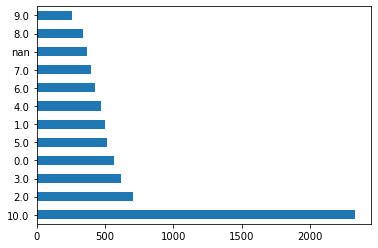

In [13]:
train.years_in_current_job.value_counts(dropna=False).plot(kind='barh')

In [14]:
test.years_in_current_job.value_counts(dropna=False).plot(kind='barh')

<AxesSubplot:>

In [15]:
train.years_in_current_job.unique()

array([nan, 10.,  8.,  6.,  7.,  5.,  1.,  0.,  4.,  3.,  2.,  9.])

In [16]:
test.years_in_current_job.unique()

array([ 4.,  1.,  3., 10.,  6.,  5.,  0.,  2.,  9.,  8.,  7., nan])

In [17]:
train.years_in_current_job= train.years_in_current_job.agg(lambda x : x.fillna( x.median()))
test.years_in_current_job = test.years_in_current_job.agg(lambda x : x.fillna( x.median()))

In [18]:
print('Intotal unique purpose values Train dataset are ' +(str(train.purpose.nunique())))
print('\n','o' * 80, '\n')
print('Intotal unique purpose values Test dataset are ' +(str(test.purpose.nunique())))

Intotal unique purpose values Train dataset are 15

 oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo 

Intotal unique purpose values Test dataset are 14


In [19]:
#Create a list of all values in Purpose column of train dataset
train_purpose = [i for i in train.purpose]

#Create a list of all values in Purpose column of test dataset
test_purpose = [i for i in test.purpose]

#Substract the values in test from values in train.

bad_label_cols = list(set(train_purpose)-set(test_purpose))

print(*bad_label_cols, sep = ", ")

renewable energy


In [20]:
train = train[train.purpose != 'renewable energy']

In [21]:
print('Different terms for loan in Train dataset are as follows:' '\n')
a_list = train.term.unique()
print(*a_list, sep = ", ")
print('\n','o' * 80, '\n')
print('Different terms for loan in Train dataset are as follows:' '\n')
b_list = test.term.unique()
print(*b_list, sep = ", ")

Different terms for loan in Train dataset are as follows:

Short Term, Long Term

 oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo 

Different terms for loan in Train dataset are as follows:

Short Term, Long Term


In [22]:
print('Null values in Train dataset are as follows:' '\n')
a = train.isnull().sum()
print(a[a>0])
print('\n','o' * 80, '\n')
print('Null values in Train dataset are as follows:' '\n')
b = test.isnull().sum()
print(b[b>0])

Null values in Train dataset are as follows:

annual_income                   1555
months_since_last_delinquent    4080
bankruptcies                      14
credit_score                    1555
dtype: int64

 oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo 

Null values in Train dataset are as follows:

annual_income                    513
months_since_last_delinquent    1358
bankruptcies                       3
credit_score                     513
dtype: int64


In [23]:
train.bankruptcies =  train.bankruptcies.agg(lambda x : x.fillna(x.median()))
train.years_in_current_job =  train.years_in_current_job.agg(lambda x : x.fillna(x.median()))
train.months_since_last_delinquent  =  train.months_since_last_delinquent.agg(lambda x : x.fillna(x.median()))
train.credit_score =  train.credit_score.agg(lambda x : x.fillna(x.median()))
train['annual_income'] =  train['annual_income'].agg(lambda x : x.fillna(x.mean()))

In [24]:
test.bankruptcies =  test.bankruptcies.agg(lambda x : x.fillna(x.median()))
test.years_in_current_job =  test.years_in_current_job.agg(lambda x : x.fillna(x.median()))
test.months_since_last_delinquent  =  test.months_since_last_delinquent.agg(lambda x : x.fillna(x.median()))
test.credit_score =  test.credit_score.agg(lambda x : x.fillna(x.median()))
test['annual_income'] =  test['annual_income'].agg(lambda x : x.fillna(x.mean()))

In [25]:
print('Are there any Null values in Train dataset?' '\n')
print(train.isnull().sum().any())
print('\n','o' * 80, '\n')
print('Are there any Null values in test dataset?' '\n')
print(test.isnull().sum().any())

Are there any Null values in Train dataset?

False

 oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo 

Are there any Null values in test dataset?

False


# 3. Feature Engineering.

<AxesSubplot:>

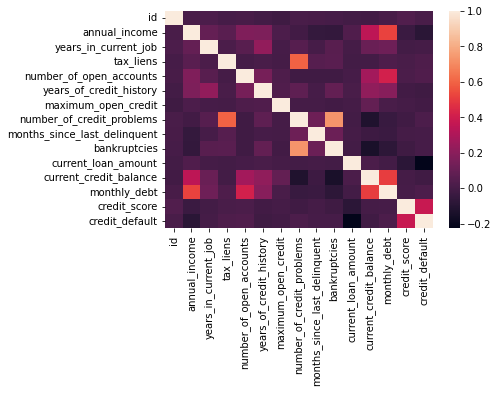

In [26]:
corr = train.corr()
sns.heatmap(train.corr(), 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [27]:
train2 = train.drop('id', axis=1)
test2 = test.copy()

In [28]:
train2  = pd.get_dummies(train2, drop_first = True)
train2.shape

(7498, 31)

In [29]:
test2  = pd.get_dummies(test2, drop_first = True)
test2.shape

(2500, 31)

# 4.Model Designing. 

In [30]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

In [31]:
X = train2.drop(['credit_default'], axis = 1)
y =train2.credit_default

In [32]:
train2.shape

(7498, 31)

## 4.1. Train & Valid Split. 

In [33]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [34]:
X_valid.shape

(1500, 30)

## 4.3. Scoring Random Forest Classifier using Confusion Matrix.

In [35]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
clf_rf = RandomForestClassifier(n_estimators=20 ,random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_valid,clf_rf.predict(X_valid))
print('Accuracy is: ',int(ac*100)," %")
cm = confusion_matrix(y_valid,clf_rf.predict(X_valid))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  76  %


<AxesSubplot:>

# 5. Feature Selection.

## 5.1. Selecting best 5 features.

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X_valid, y_valid)
a = select_feature.scores_
b = X_train.columns
df = pd.DataFrame(list(zip(b, a)),
               columns =['Column', 'Score'])
df.dtypes

Column     object
Score     float64
dtype: object

In [39]:
df['Score'] = df['Score'].replace(np.nan, 0)

In [40]:
df['Score'] = df['Score'].astype(int)

In [41]:
df.sort_values(by='Score',ascending=False)

Column       Score
5            maximum_open_credit    75297830
0                  annual_income     2272436
12                  credit_score      476373
10        current_credit_balance       17292
11                  monthly_debt        3376
29               term_Short Term          13
15           home_ownership_Rent           6
24                 purpose_other           5
13  home_ownership_Home Mortgage           4
25        purpose_small business           3
21        purpose_major purchase           2
4        years_of_credit_history           2
2                      tax_liens           1
16             purpose_buy a car           1
19  purpose_educational expenses           1
28               purpose_wedding           0
27              purpose_vacation           0
26           purpose_take a trip           0
23                purpose_moving           0
22         purpose_medical bills           0
6      number_of_credit_problems           0
20     purpose_home improvements           0
7   months_since_last_delinquent           0
17             purpose_buy house           0
1           years_in_current_job           0
14       home_ownership_Own Home           0
3        number_of_open_accounts           0
8                   bankruptcies           0
18    purpose_debt consolidation           0
9            current_loan_amount -2147483648

## 5.2. Random Forest classifier with best 5 features.

In [42]:
X_train_2 = select_feature.transform(X_train)
X_valid_2 = select_feature.transform(X_valid)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(X_train_2,y_train)
ac_2 = accuracy_score(y_valid,clf_rf_2.predict(X_valid_2))
print('Accuracy is: ',int(ac_2*100), ' %')
cm_2 = confusion_matrix(y_valid,clf_rf_2.predict(X_valid_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Accuracy is:  75  %


<AxesSubplot:>

## 5.3. Top 7 features using Recursive Feature Elimination.

In [45]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=7, step=1)
rfe = rfe.fit(X_train, y_train)

In [46]:
print('Chosen best 7 feature by rfe:',X_valid.columns[rfe.support_])

Chosen best 7 feature by rfe: Index(['annual_income', 'years_of_credit_history', 'maximum_open_credit',
       'current_loan_amount', 'current_credit_balance', 'monthly_debt',
       'credit_score'],
      dtype='object')


In [47]:
rfe.score(X_valid, y_valid)

0.7533333333333333

## 5.4. Finding optimal features using Recursive Feature Elimination and Cross-Validation Selection.

In [48]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 12
Best features : Index(['annual_income', 'years_in_current_job', 'number_of_open_accounts',
       'years_of_credit_history', 'maximum_open_credit',
       'number_of_credit_problems', 'months_since_last_delinquent',
       'current_loan_amount', 'current_credit_balance', 'monthly_debt',
       'credit_score', 'term_Short Term'],
      dtype='object')


In [49]:
rfecv.score(X_valid, y_valid)

0.7713333333333333

In [50]:
filtered_column = (X_train.columns[rfecv.support_]).tolist()
filtered_column

['annual_income',
 'years_in_current_job',
 'number_of_open_accounts',
 'years_of_credit_history',
 'maximum_open_credit',
 'number_of_credit_problems',
 'months_since_last_delinquent',
 'current_loan_amount',
 'current_credit_balance',
 'monthly_debt',
 'credit_score',
 'term_Short Term']

## 5.5. Tree based feature selection and random forest classification.

In [51]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(15, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Feature ranking:
1. feature 12 (0.184213)
2. feature 9 (0.121173)
3. feature 5 (0.090344)
4. feature 11 (0.088631)
5. feature 10 (0.086451)
6. feature 4 (0.084058)
7. feature 0 (0.082016)
8. feature 3 (0.060850)
9. feature 7 (0.053827)
10. feature 1 (0.045664)
11. feature 29 (0.027149)
12. feature 6 (0.011098)
13. feature 15 (0.008864)
14. feature 18 (0.008815)
15. feature 13 (0.008718)
16. feature 8 (0.007558)
17. feature 24 (0.006271)
18. feature 14 (0.006182)
19. feature 20 (0.004379)
20. feature 2 (0.003841)
21. feature 22 (0.002493)
22. feature 16 (0.001671)
23. feature 21 (0.001257)
24. feature 25 (0.001249)
25. feature 17 (0.001064)
26. feature 26 (0.000792)
27. feature 28 (0.000617)
28. feature 27 (0.000439)
29. feature 23 (0.000194)
30. feature 19 (0.000120)


# 6. Preparing Submission.

In [52]:
rfecv.score(X_valid, y_valid)

0.7713333333333333

In [53]:
X_train.filter(filtered_column)
X_valid.filter(filtered_column)

annual_income  years_in_current_job  number_of_open_accounts  \
2602   7.670870e+05                   8.0                      7.0   
2679   1.516656e+06                   5.0                      8.0   
5487   8.163540e+05                   3.0                      5.0   
2569   1.168158e+06                   0.0                      8.0   
3379   8.757480e+05                   6.0                     10.0   
...             ...                   ...                      ...   
2914   1.366392e+06                   4.0                      6.0   
2866   1.128961e+06                   8.0                      8.0   
20     1.651993e+06                  10.0                     11.0   
4554   1.496592e+06                  10.0                      8.0   
1328   1.723851e+06                   8.0                      8.0   

      years_of_credit_history  maximum_open_credit  number_of_credit_problems  \
2602                     12.1             373626.0                        0.0   
2679                     37.6             353518.0                        1.0   
5487                      5.4             103246.0                        0.0   
2569                     15.4             567996.0                        0.0   
3379                      9.7             785466.0                        0.0   
...                       ...                  ...                        ...   
2914                     11.5             239382.0                        0.0   
2866                     30.6             720192.0                        0.0   
20                       26.5             663894.0                        0.0   
4554                     22.0             110308.0                        0.0   
1328                     17.9             846912.0                        0.0   

      months_since_last_delinquent  current_loan_amount  \
2602                          32.0           99999999.0   
2679                          32.0           99999999.0   
5487                          32.0              65956.0   
2569                          77.0             383240.0   
3379                           7.0             396792.0   
...                            ...                  ...   
2914                          32.0             172546.0   
2866                          32.0             376662.0   
20                            44.0             585090.0   
4554                          32.0           99999999.0   
1328                          32.0           99999999.0   

      current_credit_balance  monthly_debt  credit_score  term_Short Term  
2602                124887.0        8118.0         743.0                1  
2679                216467.0       12222.0         738.0                1  
5487                 26486.0         816.0         733.0                1  
2569                332595.0       28328.0         740.0                0  
3379                311372.0       22404.0        6690.0                0  
...                      ...           ...           ...              ...  
2914                164977.0        9966.0         731.0                1  
2866                320321.0       12362.0         743.0                1  
20                  252852.0        8742.0         697.0                0  
4554                 11438.0       17373.0         744.0                0  
1328                604903.0       20686.0         700.0                0  

[1500 rows x 12 columns]

In [54]:
rfecv.score(X_valid, y_valid)

0.7713333333333333

In [55]:
test3 =test2.filter(filtered_column)
test3.shape

(2500, 12)

In [56]:
X_train_0 =X_train.filter(filtered_column)
X_train_0.shape

(5998, 12)

In [57]:
X_valid_0 =X_valid.filter(filtered_column)
X_valid_0.shape

(1500, 12)

In [58]:
rfecv.fit(X_train_0, y_train)
rfecv.score(X_valid_0, y_valid)

0.7673333333333333

In [59]:
y_pred = rfecv.predict(test3)

In [60]:
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)